In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Problem 1

In [2]:
# pearl curve
p = lambda t, a, b, L : L / (1 + a*np.exp(-1*b*t)) 

# gompertz curve
g = lambda t, b, k, L : L*np.exp( -1*b*np.exp(-k*t) )

In [3]:
# transcribed data for PSR and fraction of acceptability
psr = [4.3, 2.4, 3.3, 4.4, 3.8, 2.6, 3.2, 2.4, 1.3, 1.1, 3.8, 3.8, 3.8, 3.8, 3.2, 1.3, 1.3, 2.1, 1.5, 2.4, 4.2, 3.9, 3.1, 2.2, 1.5, 2.9, 1.6, 4, 4.2, 2.9, 4.1, 4, 3.2, 2.4, 2.9, 2.4, 1.7, 1, 1.3, 3.2, 2.7, 1.6, 1.4, 2.6, 3.4, 2.9, 4.3, 4.3, 4.2, 3.9, 3.8, 3.4, 3.1, 4.1, 3.4, 3.4, 2.8, 3.5, 3.3, 3.3, 3.6, 3.2, 3.4, 1.8, 3.3, 2.6, 3.2, 1.7, 2.4, 3, 3.3, 2.7, 2.4, 0.9]
foa = [1, 0, 0.6, 1, 0.9, 0.3, 0.6, 0.1, 0, 0, 1, 1, 1, 1, 0.6, 0, 0, 0, 0, 0, 1, 1, 0.4, 0, 0, 0.6, 0, 1, 1, 0.3, 1, 1, 0.6, 0.2, 0.4, 0.3, 0.1, 0, 0, 0.7, 0.4, 0, 0, 0.4, 0.9, 0.5, 1, 1, 1, 0.9, 1, 0.6, 0.7, 1, 1, 0.9, 0.6, 0.9, 0.8, 0.9, 1, 0.8, 0.8, 0, 0.9, 0.4, 0.5, 0, 0.1, 0.6, 0.7, 0.6, 0.2, 0]

In [4]:
# find total sum of squares for use in coefficient of determination calculation
dif = psr - np.mean(psr)
sst = np.dot(dif, dif)

# find best fit parameters, standard error, and coefficient of determination for pearl curve
print("Pearl Curve")
pcon, pcov = curve_fit(p, foa, psr)
print("   Best fit parameters: a={}, b={}, L={}".format(*pcon))
perr = np.sqrt(np.diag(pcov))
print("       Standard errors: a:{}, b:{}, L:{}".format(*perr))
pres = np.array([(psr[i] - p(foa[i], *pcon)) for i in range(len(foa))])
pssr = np.dot(pres, pres)
pcod = 1 - pssr/sst
print("Coeff of determination:", pcod)

print("")

# find best fit parameters, standard error, and coefficient of determination for gompertz curve
print("Gompertz Curve")
gcon, gcov = curve_fit(g, foa, psr)
print("   Best fit parameters: b={}, k={}, L={}".format(*gcon))
gerr = np.sqrt(np.diag(gcov))
print("       Standard errors: b:{}, k:{}, L:{}".format(*gerr))
gres = np.array([(psr[i] - g(foa[i], *gcon)) for i in range(len(foa))])
gssr = np.dot(gres, gres)
gcod = 1 - gssr/sst
print("Coeff of determination:", gcod)

Pearl Curve
   Best fit parameters: a=1.8515299901086186, b=2.1149415373262475, L=4.765841808326304
       Standard errors: a:0.25834017286372196, b:0.3752251387779599, L:0.4769261728763557
Coeff of determination: 0.8821070281945146

Gompertz Curve
   Best fit parameters: b=1.1613951475087168, k=1.3365145065800927, L=5.285912987669775
       Standard errors: b:0.1386553183618341, k:0.35015616184113346, L:0.7966175015145335
Coeff of determination: 0.8845528371455351


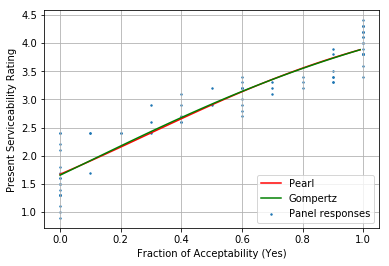

In [5]:
plt.scatter(foa, psr, s=2, label="Panel responses")
x = np.arange(0, 1, .01)
plt.plot(x, p(x, *pcon), c="red", label="Pearl")
plt.plot(x, g(x, *gcon), c="green", label="Gompertz")
plt.xlabel("Fraction of Acceptability (Yes)")
plt.ylabel("Present Serviceability Rating")
plt.legend(loc="lower right")
plt.grid()
plt.savefig("q1.png", dpi="figure")
plt.show()

# Problem 2

## Part 1

In [6]:
# constants
beta = 2
theta = 100
T = 20

# functions
R = lambda t: np.exp(-(t/theta)**beta)
Rm = lambda t, n: (R(T)**n)*(R(t-n*T))
n = lambda t: t//T # n is a function of T, incrementing every 20 months of t

# time range
t = np.arange(0,100,1)

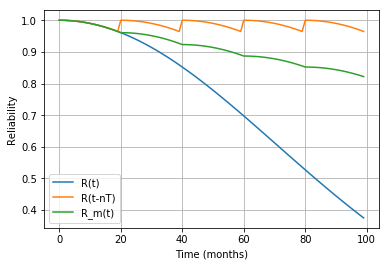

In [7]:
plt.plot(t, R(t), label="R(t)")
plt.plot(t, R(t-n(t)*T), label="R(t-nT)")
plt.plot(t, Rm(t, n(t)), label="R_m(t)")
plt.xlabel("Time (months)")
plt.ylabel("Reliability")
plt.legend()
plt.grid()
plt.savefig("q2.png", dpi="figure")
plt.show()

## Part 2

Solved using Broyden’s first Jacobian approximation for finding the root of a function.

In [8]:
Rmt = lambda t: Rm(t, n(t)) - 0.8
from scipy.optimize import broyden1 # the root-finding method
sol = broyden1(Rmt, 105)
print(sol)

115.21241700102095


In [9]:
Rm(sol, n(sol))

0.8000014305716107